# Import the main libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Mount google Drive

In [ ]:
#Montar el drive e ir a la carpeta
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd /content/drive/MyDrive/tfg_arturo_fredes/
%ls -lht

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/14vm5MGzqG524llIllY_y_2zZi54Re8hx/tfg_arturo_fredes
total 3.6G
-rw------- 1 root root 1.7M Sep  1 11:00 'Toy model.ipynb'
-rw------- 1 root root 3.0M Sep  1 10:54  Lorenz_Attractor.ipynb
-rw------- 1 root root 111K Aug 19 14:23  plot.png
drwx------ 2 root root 4.0K Aug 19 10:45  modelos/
-rw------- 1 root root  181 Aug  9 20:54  Resultados.gsheet
-rw------- 1 root root 1.7M Aug  9 20:46  iterpredLorenz.txt
-rw------- 1 root root 833K Aug  8 11:27  iterpred2.txt
-rw------- 1 root root 835K Aug  8 10:27  iterpred1.txt
-rw------- 1 root root  46K Aug  8 09:19  Lorenz_Iter_LSTM_proj_1.png
-rw------- 1 root root  44K Aug  8 09:19  Lorenz_S-VLSTM_proj_1.png
-rw------- 1 root root 118K Aug  8 09:18  Lorenz_S-VLSTM_3D_1.png
-rw------- 1 root root 116K Aug  8 09:18  Lorenz_Iter_LSTM_3D_1.png
-rw------- 1 root root  45K Aug  8 09:15  Lorenz_Iter_LSTM_proj_0.png
-rw------- 1 root root 124K Aug  8 09:15  Lorenz_Iter_LSTM_3D_0.png
-rw

In [ ]:
#cuenta edelvives
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/tfg_arturo_fredes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/14vm5MGzqG524llIllY_y_2zZi54Re8hx/tfg_arturo_fredes


In [ ]:
%cd /content/drive/MyDrive/TFG_Físicas_2022-23/tfg_arturo_fredes/
%ls -lht

[Errno 2] No such file or directory: '/content/drive/MyDrive/TFG_Físicas_2022-23/tfg_arturo_fredes/'
/content/drive/.shortcut-targets-by-id/14vm5MGzqG524llIllY_y_2zZi54Re8hx/tfg_arturo_fredes
total 3.6G
-rw------- 1 root root 1.7M Sep  1 11:00 'Toy model.ipynb'
-rw------- 1 root root 3.0M Sep  1 10:54  Lorenz_Attractor.ipynb
-rw------- 1 root root 111K Aug 19 14:23  plot.png
drwx------ 2 root root 4.0K Aug 19 10:45  modelos/
-rw------- 1 root root  181 Aug  9 20:54  Resultados.gsheet
-rw------- 1 root root 1.7M Aug  9 20:46  iterpredLorenz.txt
-rw------- 1 root root 833K Aug  8 11:27  iterpred2.txt
-rw------- 1 root root 835K Aug  8 10:27  iterpred1.txt
-rw------- 1 root root  46K Aug  8 09:19  Lorenz_Iter_LSTM_proj_1.png
-rw------- 1 root root  44K Aug  8 09:19  Lorenz_S-VLSTM_proj_1.png
-rw------- 1 root root 118K Aug  8 09:18  Lorenz_S-VLSTM_3D_1.png
-rw------- 1 root root 116K Aug  8 09:18  Lorenz_Iter_LSTM_3D_1.png
-rw------- 1 root root  45K Aug  8 09:15  Lorenz_Iter_LSTM_proj_0.

#Generating and saving Data

## Generating Data, Lorenz Attractor


In [ ]:
def rungekutta4(f, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(x[i])
        k2 = f(x[i] + k1 * h / 2.)
        k3 = f(x[i] + k2 * h / 2.)
        k4 = f(x[i] + k3 * h)
        x[i+1] = x[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return x

In [ ]:
#Function that returns the equations of Lorentz Attractor
def Lorenz_2(x):
  a=10
  b=28
  c=8/3
  return np.array([a*(x[1]-x[0]),x[0]*(b-x[2])-x[1],x[0]*x[1]-c*x[2]])

def generate_data_2(n_steps, batch_size):
  data=[]
  targets=[]
  t = np.linspace(0, 100, n_steps)
  for i in range (1,batch_size+1):
    x0 = np.random.uniform(-1.0, 1.0)
    y0 = np.random.uniform(-1.0, 1.0)
    z0 = np.random.uniform(-1.0, 1.0)
    results =  rungekutta4(f=Lorenz_2, x0=[x0, y0,z0],t=t)
    data.append(results[:n_steps])

  return np.array(data)

In [ ]:
n_steps=1000 # Diverge si el número de pasos es pequeño
target_len=10
batch_size=500

data=generate_data_2(n_steps,batch_size)

In [ ]:
print(data.shape)
print(data[0].shape)

(500, 1000, 3)
(1000, 3)


## Saving Data (takes too long to generate everytime)

In [ ]:
file_path = './data_def.txt'
data_2D = data.reshape(-1, data.shape[-1])
np.savetxt(file_path, data_2D, fmt='%.8f')

#Reading and manipulating Data

## Reading Data

In [ ]:
# Load the data from the text document
#file_path = '/content/drive/MyDrive/tfg_arturo_fredes/data_lorenz.txt'
file_path = 'data_lorenz.txt'
data = np.loadtxt(file_path, dtype=float)


# Determine the shape of the original 3D array

time_steps=1000 #small data set (def)
rows, cols = data.shape
num_slices = rows // time_steps

# Reshape the 2D array back into a 3D array
data = np.array(data.reshape(num_slices, time_steps, cols))
print(data.shape)


(5000, 1000, 3)


## Bigger time window (optional)
With 10000 timesteps it takes too long to train the models, so I will make the time window bigger to have fewer points.

In [ ]:
new_time_window = 5
data = data[:, ::new_time_window, :]

In [ ]:
data.shape


## Shorter Series (optional)

In [ ]:
data.shape

(50000, 1000, 3)

In [ ]:
data = np.reshape(data, (50000, 1000, 3))#reshape each timeseries into 10 timeseries of 10 steps

In [ ]:
#shuffle and select 5000 timeseries
np.random.shuffle(data)
data=data[:5000]


## Normalizing

In [ ]:
mean = np.mean(data, axis=(0, 1))
std = np.std(data, axis=(0, 1))

In [ ]:
data=(data-mean)/std



## Dividing data
Training, validation and testing

In [ ]:
#we divide data into training, validation and testing
n_steps=data.shape[1]
target_len=100
train_samples=3500
val_samples=1000
train_data= data[:train_samples,:n_steps-target_len,:]
train_tar=data[:train_samples,n_steps-target_len+1:,:]
val_data= data[train_samples:train_samples+val_samples,:n_steps-target_len,:]
val_tar= data[train_samples:train_samples+val_samples,n_steps-target_len+1:,:]
test_data= data[train_samples+val_samples:,:n_steps-target_len,:]
test_tar= data[train_samples+val_samples:,n_steps-target_len+1:,:]

# Forecasting the next timestep




## Baselines
We set the Baseline of our problem.


1.   Predicting the last value --> MSE 0.02
2.   Dense NN ('Adam', 20 Epochs)--> MSE 0.004



In [ ]:
#BASELINE1
#we predict the last value from each series

random_int = np.random.randint(0, len(test_tar))
print('MSE: ')
np.mean(tf.keras.losses.mean_squared_error(test_tar[:,0], test_data[:,-1]))

MSE: 


0.022292282701834046

In [ ]:
test_data[random_int][-1]

array([-13.48631619, -18.53707527,  27.57958094])

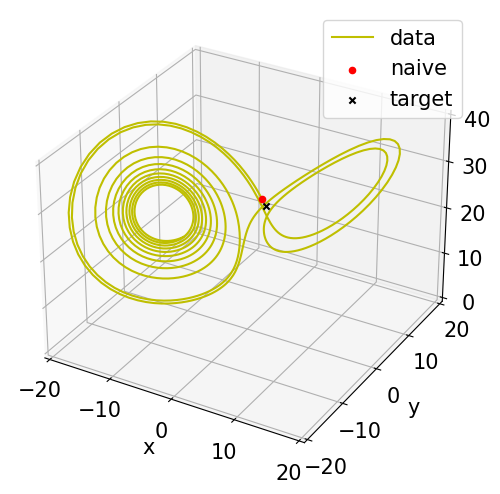

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
random_int=1
# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])*std[0]+mean[0]
y_values = np.array([result[1] for result in test_data[random_int]])*std[1]+mean[1]
z_values = np.array([result[2] for result in test_data[random_int]])*std[2]+mean[2]

x_tar=test_tar[random_int][0][0]*std[0]+mean[0]
y_tar=test_tar[random_int][0][1]*std[1]+mean[1]
z_tar=test_tar[random_int][0][2]*std[2]+mean[2]

x_naive=test_data[random_int][-1][0]*std[0]+mean[0]
y_naive=test_data[random_int][-1][1]*std[1]+mean[1]
z_naive=test_data[random_int][-1][2]*std[2]+mean[2]


fig = plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 15
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,'y',label='data')
ax.scatter(x_naive,y_naive,z_naive, c='red', label='naive')
ax.scatter(x_tar,y_tar,z_tar, c='black',marker='x', label='target')

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z', labelpad=10)

ax.legend()

plt.savefig('./naive_lorenz{i}.png'.format(i=random_int))

In [ ]:
#BASELINE2
#fully connected dense network with flattened input
model1 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=[train_data.shape[1], 3]),
tf.keras.layers.Dense(3)
])

model1.summary()
model1.compile(loss='mse',
          optimizer='adam',
          metrics=['mae'])

model1.fit(train_data, train_tar[:,0,:], epochs=20, validation_data=(val_data, val_tar[:,0,:]))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 3)                 8103      
                                                                 
Total params: 8,103
Trainable params: 8,103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
110/110 [==============================] - 2s 6ms/step - loss: 72.5332 - mae: 6.2893 - val_loss: 28.6298 - val_mae: 4.1221
Epoch 2/20
110/110 [==============================] - 0s 4ms/step - loss: 21.5697 - mae: 3.5476 - val_loss: 19.4583 - val_mae: 3.3989
Epoch 3/20
110/110 [==============================] - 0s 3ms/step - loss: 12.9639 - mae: 2.6836 - val_loss: 11.6237 - val_mae: 2.5340
Epoch 4/20
110/110 [============================

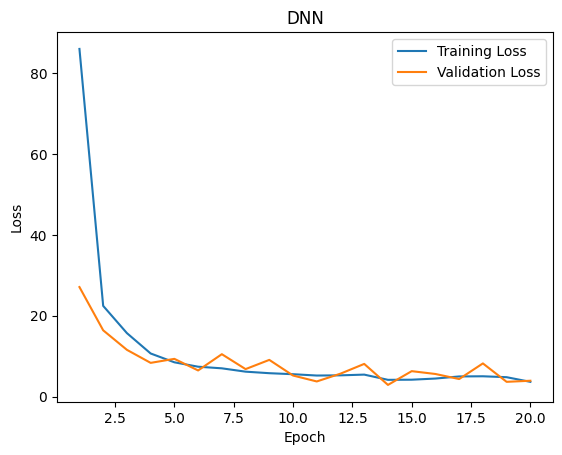

In [ ]:
train_loss=[86.0071,22.4443,15.7068,10.6695,8.4852,7.4005,6.9976,6.1723,5.7931,5.5429,5.2150, 5.2621,5.4433,4.1499,4.1844,4.4689,4.9883,5.0311, 4.8030,3.6549]
val_loss=[27.1010,16.4008,11.5704,8.3480,9.3406,6.4720,10.4948,6.8049,9.0846,5.2156,3.7501,5.6798,8.0913,2.8925,6.2985,5.5973,4.3464,8.2140,3.6560,3.9278]

epochs = range(1, len(train_loss) + 1)



# Plot the training loss and validation loss vs. epoch
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DNN')
plt.legend()
plt.show()


1/1 [==============================] - 0s 20ms/step


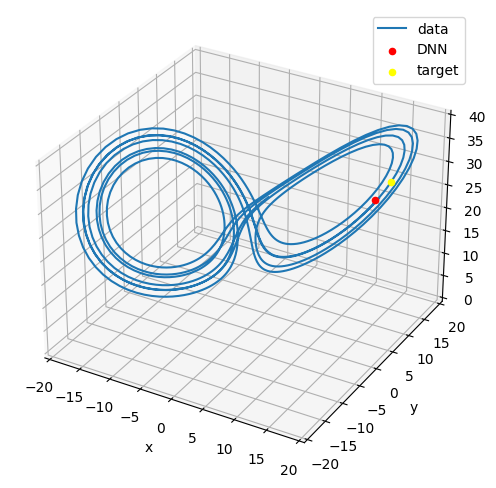

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

random_int = np.random.randint(0, len(test_tar))

# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])
y_values = np.array([result[1] for result in test_data[random_int]])
z_values = np.array([result[2] for result in test_data[random_int]])

x_tar=test_tar[random_int][0][0]
y_tar=test_tar[random_int][0][1]
z_tar=test_tar[random_int][0][2]

pred=model1.predict(test_data[random_int].reshape(1,train_data.shape[1], 3)) #make a prediction for a random timeseries
x_DNN=pred[0][0]
y_DNN=pred[0][1]
z_DNN=pred[0][2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,color='yellow',label='data')
ax.scatter(x_DNN,y_DNN,z_DNN,'x' ,c='black', label='DNN')
ax.scatter(x_tar,y_tar,z_tar, c='red', label='target')

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()


## DNN

In [ ]:
model2 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=[train_data.shape[1], 3]),
tf.keras.layers.Dense(64),
tf.keras.layers.Dense(64),
tf.keras.layers.Dense(3)
])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 64)                172864    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='mse',
          optimizer='adam',
          metrics=['mae'])

history=model2.fit(train_data, train_tar[:,0,:], epochs=20, validation_data=(val_data, val_tar[:,0,:]))

Epoch 1/20
110/110 [==============================] - 6s 6ms/step - loss: 1.0139 - mae: 0.6289 - val_loss: 0.1189 - val_mae: 0.2516
Epoch 2/20
110/110 [==============================] - 0s 4ms/step - loss: 0.0943 - mae: 0.2193 - val_loss: 0.0696 - val_mae: 0.1862
Epoch 3/20
110/110 [==============================] - 1s 5ms/step - loss: 0.0717 - mae: 0.1947 - val_loss: 0.0553 - val_mae: 0.1666
Epoch 4/20
110/110 [==============================] - 0s 4ms/step - loss: 0.0589 - mae: 0.1762 - val_loss: 0.0425 - val_mae: 0.1463
Epoch 5/20
110/110 [==============================] - 0s 4ms/step - loss: 0.0453 - mae: 0.1534 - val_loss: 0.0408 - val_mae: 0.1504
Epoch 6/20
110/110 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.1511 - val_loss: 0.0350 - val_mae: 0.1396
Epoch 7/20
110/110 [==============================] - 0s 4ms/step - loss: 0.0386 - mae: 0.1434 - val_loss: 0.0375 - val_mae: 0.1413
Epoch 8/20
110/110 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
model2.save('./Lorenz_short_model_DNN_1000_norm.h5',save_format='h5')

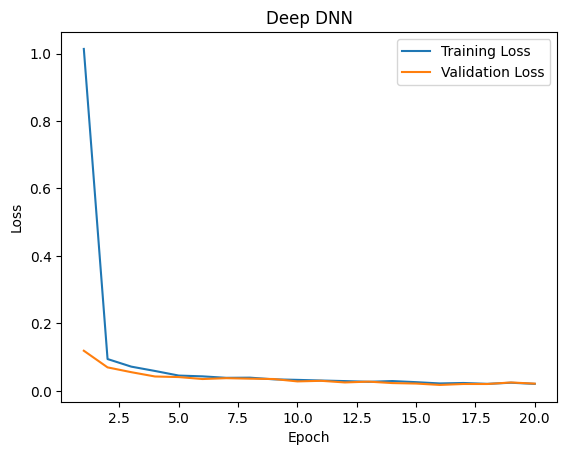

In [ ]:
train_loss = history.history['loss']
epochs = range(1, len(train_loss) + 1)

# Extract the validation loss values
val_loss = history.history['val_loss']

# Plot the training loss and validation loss vs. epoch
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep DNN')
plt.legend()
plt.show()

1/1 [==============================] - 0s 35ms/step


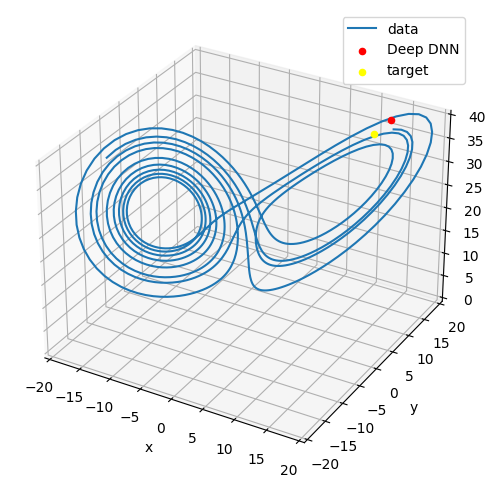

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#random_int = np.random.randint(0, len(test_tar))
random_int=0
# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])
y_values = np.array([result[1] for result in test_data[random_int]])
z_values = np.array([result[2] for result in test_data[random_int]])

x_tar=test_tar[random_int][0][0]
y_tar=test_tar[random_int][0][1]
z_tar=test_tar[random_int][0][2]

pred=model2.predict(test_data[random_int].reshape(1,train_data.shape[1], 3)) #make a prediction for a random timeseries
x_DRNN=pred[0][0]
y_DRNN=pred[0][1]
z_DRNN=pred[0][2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,label='data')
ax.scatter(x_DRNN,y_DRNN,z_DRNN, c='red', label='Deep DNN')
ax.scatter(x_tar,y_tar,z_tar, c='yellow', label='target')

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()

## Deep RNN
stack multiple layers of cells
MSE--> 0.0027 we beat the baseline!

In [ ]:
model3 = tf.keras.models.Sequential([
tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[None, 3]),
tf.keras.layers.SimpleRNN(64, return_sequences=True),
tf.keras.layers.SimpleRNN(3)
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, None, 64)          4352      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 3)                 204       
                                                                 
Total params: 12,812
Trainable params: 12,812
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='mse',
          optimizer='adam',
          metrics=['mae'])

model3.fit(train_data, train_tar[:,0,:], epochs=20, validation_data=(val_data, val_tar[:,0,:]))

Epoch 1/20
110/110 [==============================] - 316s 3s/step - loss: 0.2008 - mae: 0.3176 - val_loss: 0.1354 - val_mae: 0.2458
Epoch 2/20
110/110 [==============================] - 310s 3s/step - loss: 0.1409 - mae: 0.2397 - val_loss: 0.1273 - val_mae: 0.2233
Epoch 3/20
110/110 [==============================] - 316s 3s/step - loss: 0.1353 - mae: 0.2237 - val_loss: 0.1232 - val_mae: 0.2080
Epoch 4/20
110/110 [==============================] - 315s 3s/step - loss: 0.1354 - mae: 0.2260 - val_loss: 0.1226 - val_mae: 0.2062
Epoch 5/20
110/110 [==============================] - 311s 3s/step - loss: 0.1316 - mae: 0.2093 - val_loss: 0.1214 - val_mae: 0.2022
Epoch 6/20
110/110 [==============================] - 312s 3s/step - loss: 0.1311 - mae: 0.2093 - val_loss: 0.1216 - val_mae: 0.2097
Epoch 7/20
110/110 [==============================] - 314s 3s/step - loss: 0.1311 - mae: 0.2109 - val_loss: 0.1202 - val_mae: 0.2004
Epoch 8/20
110/110 [==============================] - 313s 3s/step - 

KeyboardInterrupt: ignored

In [ ]:
model3.save('./Lorenz_short_model_DeepRNN_1000_norm.h5',save_format='h5')

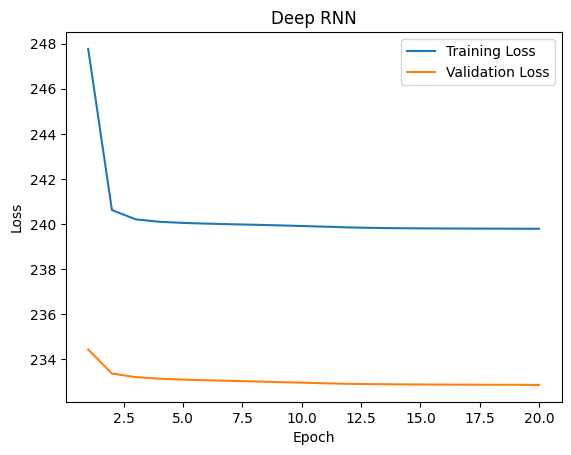

In [ ]:
train_loss = [247.7636, 240.6221, 240.2091, 240.1031, 240.0519, 240.0198, 239.9933, 239.9704, 239.9439, 239.9158, 239.8844, 239.8520, 239.8312, 239.8187, 239.8107, 239.8055, 239.8016, 239.7981, 239.7953, 239.7932]

val_loss = [234.4393, 233.3776, 233.2153, 233.1483, 233.1068, 233.0773, 233.0515, 233.0264, 232.9977, 232.9716, 232.9431, 232.9200, 232.9060, 232.8962, 232.8898, 232.8857, 232.8833, 232.8773, 232.8778, 232.8714]

epochs = range(1, len(train_loss) + 1)



# Plot the training loss and validation loss vs. epoch
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep RNN')
plt.legend()
plt.show()


1/1 [==============================] - 2s 2s/step


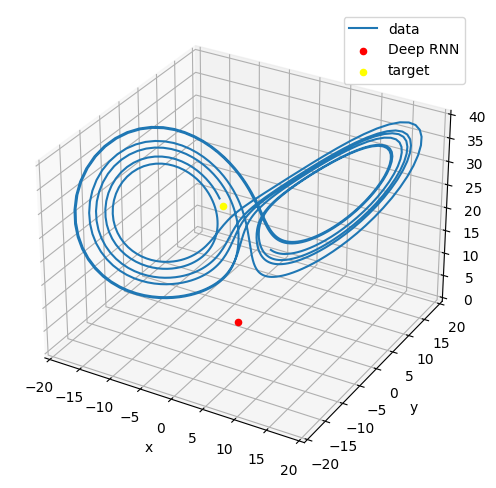

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

random_int = np.random.randint(0, len(test_tar))

# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])
y_values = np.array([result[1] for result in test_data[random_int]])
z_values = np.array([result[2] for result in test_data[random_int]])

x_tar=test_tar[random_int][0][0]
y_tar=test_tar[random_int][0][1]
z_tar=test_tar[random_int][0][2]

pred=model3.predict(test_data[random_int].reshape(1,train_data.shape[1], 3)) #make a prediction for a random timeseries
x_DRNN=pred[0][0]
y_DRNN=pred[0][1]
z_DRNN=pred[0][2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,label='data')
ax.scatter(x_DRNN,y_DRNN,z_DRNN, c='red', label='Deep RNN')
ax.scatter(x_tar,y_tar,z_tar, c='yellow', label='target')

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()

Make sure to set return_sequences=True for all recurrent layers
(except the last one, if you only care about the last output). If you
don’t, they will output a 2D array (containing only the output of
the last time step) instead of a 3D array (containing outputs for all
time steps), and the next recurrent layer will complain that you are
not feeding it sequences in the expected 3D format.

The last layer is not ideal:


1.   Cannot choose activation function
2.   it must have a single unit because we want to forecast
a univariate time series, and this means we must have a single output value per
time step. However, having a single unit means that the hidden state is just a single
number. That’s really not much, and it’s probably not that useful; presumably, the
RNN will mostly use the hidden states of the other recurrent layers to carry over all
the information it needs from time step to time step, and it will not use the final layer’s
hidden state very much

We can use a Dense layer to solve this problems. MSE is similar, but it is more efficient.


In [ ]:
model4= tf.keras.models.Sequential([
tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[None, 3]),
tf.keras.layers.SimpleRNN(64),
tf.keras.layers.Dense(3)
])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 64)          4352      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 12,803
Trainable params: 12,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(loss='mse',
          optimizer='adam',
          metrics=['mae'])

model4.fit(train_data, train_tar[:,0,:], epochs=20, validation_data=(val_data, val_tar[:,0,:]))

Epoch 1/20
110/110 [==============================] - 220s 2s/step - loss: 0.0798 - mae: 0.1527 - val_loss: 0.0036 - val_mae: 0.0407
Epoch 2/20
110/110 [==============================] - 207s 2s/step - loss: 0.0021 - mae: 0.0310 - val_loss: 0.0015 - val_mae: 0.0259
Epoch 3/20
110/110 [==============================] - 205s 2s/step - loss: 0.0011 - mae: 0.0225 - val_loss: 0.0011 - val_mae: 0.0221
Epoch 4/20
110/110 [==============================] - 202s 2s/step - loss: 6.8569e-04 - mae: 0.0183 - val_loss: 6.3823e-04 - val_mae: 0.0169
Epoch 5/20
110/110 [==============================] - 202s 2s/step - loss: 4.9094e-04 - mae: 0.0154 - val_loss: 5.9140e-04 - val_mae: 0.0168
Epoch 6/20
110/110 [==============================] - 206s 2s/step - loss: 3.5132e-04 - mae: 0.0132 - val_loss: 3.9498e-04 - val_mae: 0.0136
Epoch 7/20
110/110 [==============================] - 209s 2s/step - loss: 3.1836e-04 - mae: 0.0128 - val_loss: 3.3467e-04 - val_mae: 0.0123
Epoch 8/20
110/110 [=================

In [ ]:
model4.save('./Lorenz_short_model_DeepRNN2_1000_norm.h5',save_format='h5')

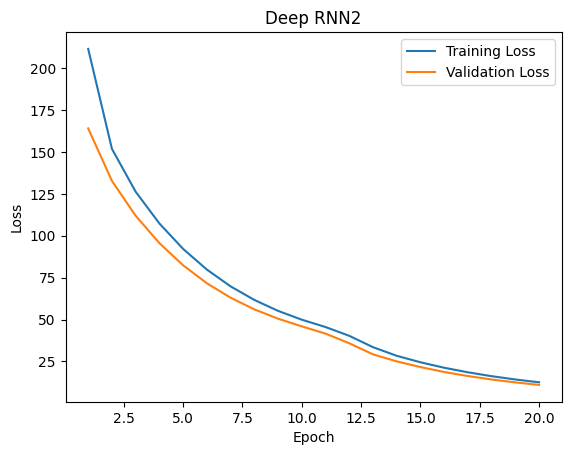

In [ ]:
train_loss = [211.4714, 151.8391, 126.2590, 107.3105, 92.1312, 79.8090, 69.7872, 61.6952, 55.1724, 49.9070, 45.5171, 40.2810, 33.5081, 28.3590, 24.4931, 21.2342, 18.5056, 16.1945, 14.2245, 12.5433]

val_loss = [164.0393, 132.7289, 111.9095, 95.5795, 82.3515, 71.6422, 63.0261, 56.0643, 50.4994, 45.9335, 41.5933, 35.8337, 29.2239, 25.0277, 21.6257, 18.6944, 16.2763, 14.2216, 12.4693, 10.9803]

epochs = range(1, len(train_loss) + 1)



# Plot the training loss and validation loss vs. epoch
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep RNN2')
plt.legend()
plt.show()


1/1 [==============================] - 0s 324ms/step


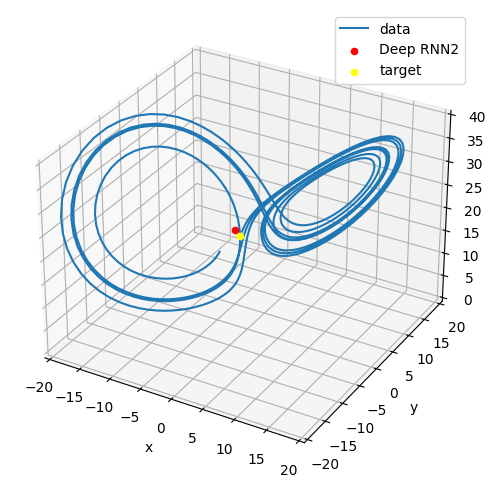

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

random_int = np.random.randint(0, len(test_tar))

# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])
y_values = np.array([result[1] for result in test_data[random_int]])
z_values = np.array([result[2] for result in test_data[random_int]])

x_tar=test_tar[random_int][0][0]
y_tar=test_tar[random_int][0][1]
z_tar=test_tar[random_int][0][2]

pred=model4.predict(test_data[random_int].reshape(1,train_data.shape[1], 3)) #make a prediction for a random timeseries
x_DRNN=pred[0][0]
y_DRNN=pred[0][1]
z_DRNN=pred[0][2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,label='data')
ax.scatter(x_DRNN,y_DRNN,z_DRNN, c='red', label='Deep RNN2')
ax.scatter(x_tar,y_tar,z_tar, c='yellow', label='target')

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()

##LSTM1

In [ ]:
model6 = tf.keras.models.Sequential([
tf.keras.layers.LSTM(64, return_sequences=True, input_shape=[None, 3]),
tf.keras.layers.LSTM(64),
tf.keras.layers.Dense(3)
])
model6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 64)          17408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 50,627
Trainable params: 50,627
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.compile(loss='mse',
          optimizer='adam',
          metrics=['mae'])

history=model6.fit(train_data, train_tar[:,0,:], epochs=20, validation_data=(val_data, val_tar[:,0,:]))

Epoch 1/20
110/110 [==============================] - 13s 76ms/step - loss: 0.0679 - mae: 0.1354 - val_loss: 0.0015 - val_mae: 0.0263
Epoch 2/20
110/110 [==============================] - 6s 59ms/step - loss: 6.7526e-04 - mae: 0.0164 - val_loss: 2.9255e-04 - val_mae: 0.0120
Epoch 3/20
110/110 [==============================] - 6s 59ms/step - loss: 1.6584e-04 - mae: 0.0085 - val_loss: 8.9949e-05 - val_mae: 0.0066
Epoch 4/20
110/110 [==============================] - 6s 58ms/step - loss: 9.4368e-05 - mae: 0.0064 - val_loss: 8.2843e-05 - val_mae: 0.0066
Epoch 5/20
110/110 [==============================] - 7s 60ms/step - loss: 1.1376e-04 - mae: 0.0070 - val_loss: 1.3745e-04 - val_mae: 0.0090
Epoch 6/20
110/110 [==============================] - 6s 58ms/step - loss: 1.1287e-04 - mae: 0.0071 - val_loss: 4.3385e-05 - val_mae: 0.0044
Epoch 7/20
110/110 [==============================] - 7s 62ms/step - loss: 6.0646e-05 - mae: 0.0053 - val_loss: 7.5980e-05 - val_mae: 0.0050
Epoch 8/20
110/110 [

In [ ]:
model6.save('./Lorenz_short_model_LSTM_1000_norm.h5',save_format='h5')

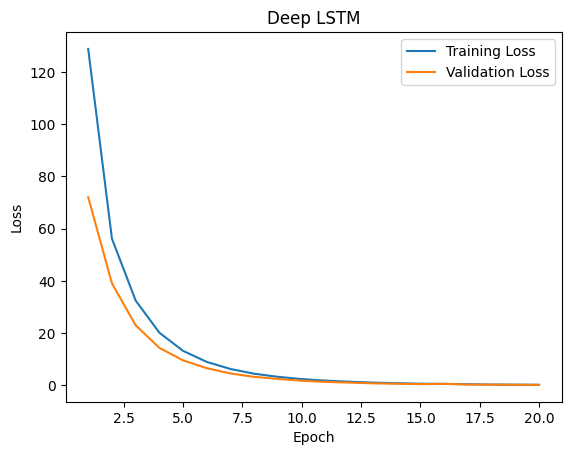

In [ ]:
train_loss = history.history['loss']
epochs = range(1, len(train_loss) + 1)

# Extract the validation loss values
val_loss = history.history['val_loss']

# Plot the training loss and validation loss vs. epoch
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep LSTM')
plt.legend()
plt.show()

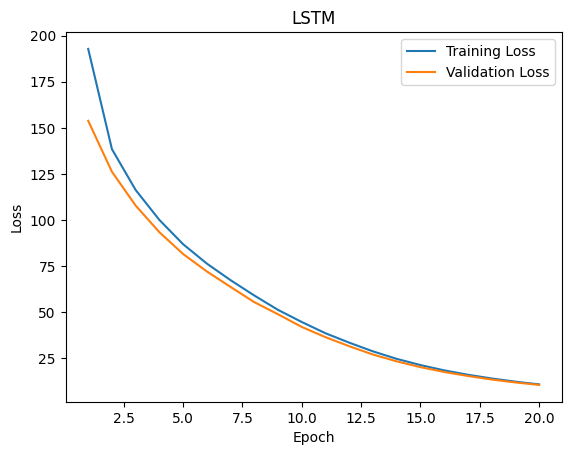

In [ ]:
train_loss = [192.8099, 138.4500, 116.2855, 100.0467, 86.8803, 76.3756, 67.3784, 59.0586, 51.2675, 44.6923, 38.5838, 33.4869, 28.7649, 24.7028, 21.3430, 18.4669, 16.0840, 14.0718, 12.3374, 10.8600]

val_loss = [153.8288, 126.1862, 107.8353, 93.3959, 81.5678, 72.1108, 63.7142, 55.4574, 48.8737, 42.0092, 36.4733, 31.5639, 27.0488, 23.3552, 20.2156, 17.6046, 15.4183, 13.5062, 11.9183, 10.5713]
epochs = range(1, len(train_loss) + 1)



# Plot the training loss and validation loss vs. epoch
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM')
plt.legend()
plt.show()


1/1 [==============================] - 1s 966ms/step


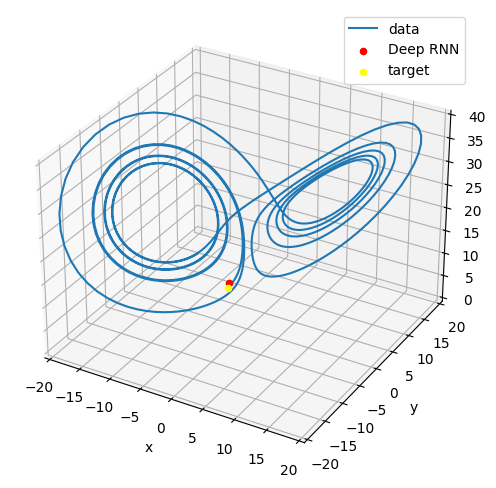

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

random_int = np.random.randint(0, len(test_tar))

# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])
y_values = np.array([result[1] for result in test_data[random_int]])
z_values = np.array([result[2] for result in test_data[random_int]])

x_tar=test_tar[random_int][0][0]
y_tar=test_tar[random_int][0][1]
z_tar=test_tar[random_int][0][2]

pred=model6.predict(test_data[random_int].reshape(1,train_data.shape[1], 3)) #make a prediction for a random timeseries
x_DRNN=pred[0][0]
y_DRNN=pred[0][1]
z_DRNN=pred[0][2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,label='data')
ax.scatter(x_DRNN,y_DRNN,z_DRNN, c='red', label='Deep RNN')
ax.scatter(x_tar,y_tar,z_tar, c='yellow', label='target')

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()

## GRU1


In [ ]:
model7 = tf.keras.models.Sequential([
tf.keras.layers.GRU(64, return_sequences=True, input_shape=[None, 3]),
tf.keras.layers.GRU(64),
tf.keras.layers.Dense(3)
])
model7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 64)          13248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model7.compile(loss='mse',
          optimizer='adam',
          metrics=['mae'])

history=model7.fit(train_data, train_tar[:,0,:], epochs=20, validation_data=(val_data, val_tar[:,0,:]))

Epoch 1/20
110/110 [==============================] - 11s 65ms/step - loss: 0.0888 - mae: 0.1453 - val_loss: 0.0017 - val_mae: 0.0302
Epoch 2/20
110/110 [==============================] - 6s 50ms/step - loss: 0.0011 - mae: 0.0228 - val_loss: 7.0165e-04 - val_mae: 0.0183
Epoch 3/20
110/110 [==============================] - 6s 52ms/step - loss: 5.4043e-04 - mae: 0.0157 - val_loss: 4.1712e-04 - val_mae: 0.0139
Epoch 4/20
110/110 [==============================] - 6s 57ms/step - loss: 3.5262e-04 - mae: 0.0126 - val_loss: 3.0919e-04 - val_mae: 0.0125
Epoch 5/20
110/110 [==============================] - 5s 50ms/step - loss: 2.5759e-04 - mae: 0.0108 - val_loss: 1.9057e-04 - val_mae: 0.0092
Epoch 6/20
110/110 [==============================] - 7s 66ms/step - loss: 1.7910e-04 - mae: 0.0090 - val_loss: 1.5297e-04 - val_mae: 0.0084
Epoch 7/20
110/110 [==============================] - 5s 49ms/step - loss: 1.2882e-04 - mae: 0.0075 - val_loss: 1.3209e-04 - val_mae: 0.0079
Epoch 8/20
110/110 [====

In [ ]:
model7.save('./Lorenz_short_model_GRU_1000_norm.h5',save_format='h5')

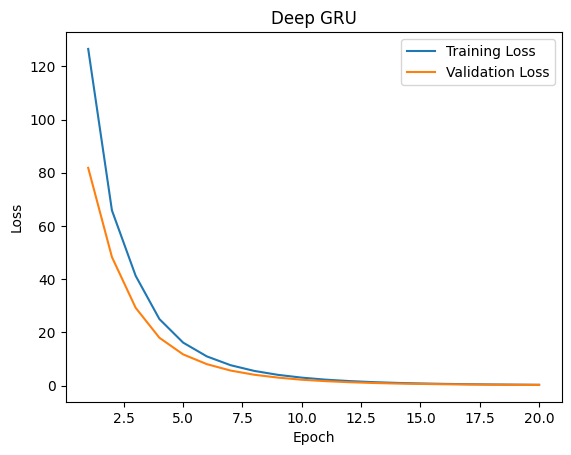

In [ ]:
train_loss = history.history['loss']
epochs = range(1, len(train_loss) + 1)

# Extract the validation loss values
val_loss = history.history['val_loss']

# Plot the training loss and validation loss vs. epoch
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep GRU')
plt.legend()
plt.show()

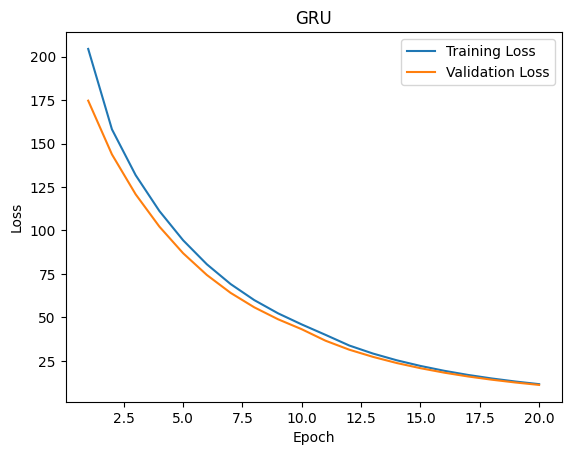

In [ ]:
train_loss = [204.5139, 158.2448, 131.8358, 111.2111, 94.3703, 80.5454, 69.1798, 59.9119, 52.3158, 45.9086, 39.9290, 33.7979, 29.1640, 25.2952, 22.0390, 19.2510, 16.8690, 14.8333, 13.0710, 11.5510]

val_loss = [174.7308, 143.8083, 120.8174, 102.2297, 86.9140, 74.3910, 64.1034, 55.7613, 48.9008, 43.1500, 36.5603, 31.3921, 27.2573, 23.7168, 20.7394, 18.1720, 15.9856, 14.1261, 12.5085, 11.1092]

epochs = range(1, len(train_loss) + 1)



# Plot the training loss and validation loss vs. epoch
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU')
plt.legend()
plt.show()


1/1 [==============================] - 1s 793ms/step


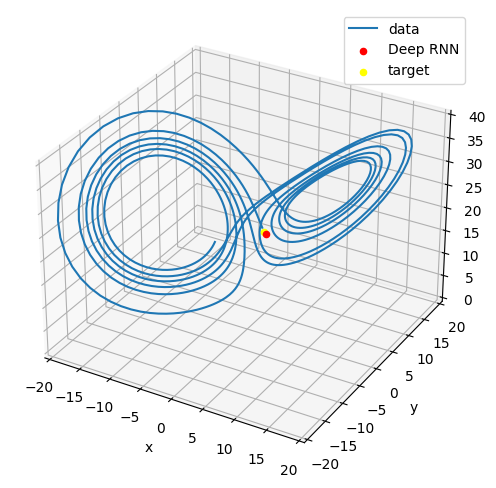

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

random_int = np.random.randint(0, len(test_tar))

# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])
y_values = np.array([result[1] for result in test_data[random_int]])
z_values = np.array([result[2] for result in test_data[random_int]])

x_tar=test_tar[random_int][0][0]
y_tar=test_tar[random_int][0][1]
z_tar=test_tar[random_int][0][2]

pred=model7.predict(test_data[random_int].reshape(1,train_data.shape[1], 3)) #make a prediction for a random timeseries
x_DRNN=pred[0][0]
y_DRNN=pred[0][1]
z_DRNN=pred[0][2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,label='data')
ax.scatter(x_DRNN,y_DRNN,z_DRNN, c='red', label='Deep RNN')
ax.scatter(x_tar,y_tar,z_tar, c='yellow', label='target')

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()

##Load a Model and make predictions

In [ ]:
%ls modelos


Lorenz_LSTM_seq-seq_1000_norm_100.h5
Lorenz_LSTM_seq-seq_1000_norm.h5
Lorenz_model_DeepRNN_2000.h5
Lorenz_model_DeepRNN2_2000.h5
Lorenz_model_GRU1_2000.h5
Lorenz_model_LSTM1_2000.h5
Lorenz_model_SimpleRNN_10000.h5
Lorenz_short_model_DeepRNN_1000.h5
Lorenz_short_model_DeepRNN_2000.h5
Lorenz_short_model_DeepRNN2_1000_norm.h5
Lorenz_short_model_DeepRNN2_2000.h5
Lorenz_short_model_DNN_1000.h5
Lorenz_short_model_DNN_1000_norm.h5
Lorenz_short_model_GRU_1000.h5
Lorenz_short_model_GRU_1000_norm.h5
Lorenz_short_model_GRU1_2000.h5
Lorenz_short_model_LSTM_1000.h5
Lorenz_short_model_LSTM_1000_norm.h5
Lorenz_short_model_LSTM1_2000.h5
Lorenz_short_model_SimpleRNN.h5
Lorenz_short_model_S-V_LSTM_1000_norm_100.h5
model_lorenz_simpleRNN_seq-seq.h5
model_lstm_simple_10000.h5


In [ ]:
model = tf.keras.models.load_model('./modelos/Lorenz_short_model_DeepRNN2_1000_norm.h5')

1/1 [==============================] - 0s 260ms/step


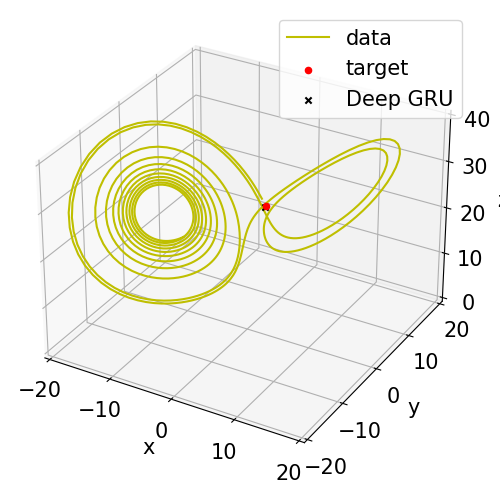

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#random_int = np.random.randint(0, len(test_tar))
random_int=1
# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])*std[0]+mean[0]
y_values = np.array([result[1] for result in test_data[random_int]])*std[1]+mean[1]
z_values = np.array([result[2] for result in test_data[random_int]])*std[2]+mean[2]

x_tar=test_tar[random_int][0][0]*std[0]+mean[0]
y_tar=test_tar[random_int][0][1]*std[1]+mean[1]
z_tar=test_tar[random_int][0][2]*std[2]+mean[2]

pred=model.predict(test_data[random_int].reshape(1,train_data.shape[1], 3)) #make a prediction for a random timeseries
x_DRNN=pred[0][0]*std[0]+mean[0]
y_DRNN=pred[0][1]*std[1]+mean[1]
z_DRNN=pred[0][2]*std[2]+mean[2]

fig = plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 15
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,'y',label='data')
ax.scatter(x_tar,y_tar,z_tar, c='red', label='target',zorder=10)
ax.scatter(x_DRNN,y_DRNN,z_DRNN, c='black',marker='x', label='Deep GRU',zorder=11)

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()


plt.savefig('./Lorenz_RNN{i}.png'.format(i=random_int))

# Forecasting Several timesteps
We have two options:


1.   Forecast the next step, add it to the timeseriries, and repeat
2.   Use a sequence to sequence network and train it to give all steps at once



## Forecast the next step, add it to the timeseries, and repeat

In [ ]:
model1 = tf.keras.models.load_model('./modelos/Lorenz_short_model_LSTM_1000_norm.h5')

In [ ]:
#predict
n_pred=100
random_int = np.random.randint(0, len(test_tar))
random_int=16
sequence=test_data[random_int].reshape(1,train_data.shape[1], 3)
for i in range (0,n_pred):
  pred=model1.predict(sequence[:,i:,:]) #predict next timestep with previous 1000 steps
  sequence=np.concatenate((sequence, pred.reshape(1, 1, 3)), axis=1) #add it to the sequence


NameError: ignored

In [ ]:
sequence[0,train_data.shape[1]+1:,:].shape


(99, 3)

tf.Tensor(30.7558078280361, shape=(), dtype=float64)
tf.Tensor(18.221295448948716, shape=(), dtype=float64)


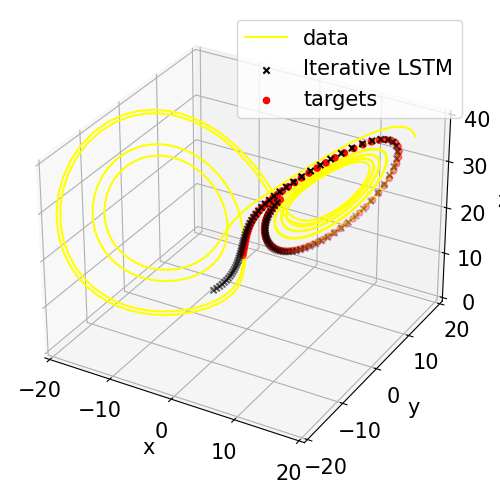

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int,:train_data.shape[1],:]])*std[0]+mean[0]
y_values = np.array([result[1] for result in test_data[random_int,:train_data.shape[1],:]])*std[1]+mean[1]
z_values = np.array([result[2] for result in test_data[random_int,:train_data.shape[1],:]])*std[2]+mean[2]

# Extract x, y, z values from the targets

x_tar_values = np.array([result[0] for result in test_tar[random_int,:,:]])*std[0]+mean[0]
y_tar_values = np.array([result[1] for result in test_tar[random_int,:,:]])*std[1]+mean[1]
z_tar_values = np.array([result[2] for result in test_tar[random_int,:,:]])*std[2]+mean[2]

#predicted values
x_pred_values = np.array([result[0] for result in sequence[0,train_data.shape[1]+1:,:]])*std[0]+mean[0]
y_pred_values = np.array([result[1] for result in sequence[0,train_data.shape[1]+1:,:]])*std[1]+mean[1]
z_pred_values = np.array([result[2] for result in sequence[0,train_data.shape[1]+1:,:]])*std[2]+mean[2]



fig = plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 15
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,label='data',c='yellow')
ax.scatter(x_pred_values, y_pred_values, z_pred_values,c='black',marker='x', label='Iterative LSTM')
ax.scatter(x_tar_values, y_tar_values, z_tar_values,c='red' ,label='targets')

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()
plt.savefig('./Lorenz_Iter_LSTM_3D_{i}.png'.format(i=random_int))
print(tf.reduce_mean(tf.keras.metrics.mean_squared_error(test_tar[random_int]*std+mean,sequence[0,train_data.shape[1]+1:,:]*std+mean)))
print(tf.reduce_mean(tf.keras.metrics.mean_squared_error(test_tar[random_int,-1,:]*std+mean,sequence[0,-1,:]*std+mean)))

<ipython-input-35-e6fdf9bb632e>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(900,999), x_tar_values.reshape(99) , 'ro', label='target', color='red')
<ipython-input-35-e6fdf9bb632e>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(900,999), x_pred_values.reshape(99), 'bx', label='Iterative LSTM', color='black')


<Figure size 1000x600 with 0 Axes>

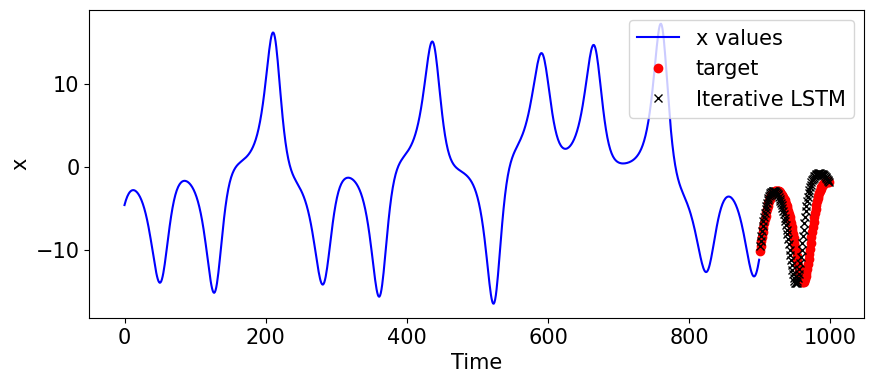

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create an array for time
time_values = np.arange(len(test_data[random_int]))
time_values_tar = np.arange(900,1000)
# Plot the 3D figure
fig = plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 15

# Create a 2D plot for the projection on the x-axis
fig2 = plt.figure(figsize=(10, 4))
plt.plot(time_values, x_values, label='x values', color='blue')
plt.plot(np.arange(900,999), x_tar_values.reshape(99) , 'ro', label='target', color='red')
plt.plot(np.arange(900,999), x_pred_values.reshape(99), 'bx', label='Iterative LSTM', color='black')

plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.savefig('./Lorenz_Iter_LSTM_proj_{i}.png'.format(i=random_int))
plt.show()

In [ ]:
n_pred=99
y_pred=[]
for i in range(0,500):
  sequence=test_data[i].reshape(1,test_data.shape[1], 3)
  for j in range (0,n_pred):
    pred=model1.predict(sequence[:,j:,:]) #predict next timestep with previous 1000 steps
    sequence=np.concatenate((sequence, pred.reshape(1, 1, 3)), axis=1) #add it to the sequence
  y_pred.append(sequence[0,test_data.shape[1]:,:])
  print(i)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 68ms/step
450
1/1 [==============================] - 0s 49ms/step
451
1/1 [==============================] - 0s 55ms/step
452
1/1 [==============================] - 0s 45ms/step
453
1/1 [==============================] - 0s 82ms/step
454
1/1 [==============================] - 0s 39ms/step
455
1/1 [==============================] - 0s 44ms/step
456
1/1 [==============================] - 0s 51ms/step
457
1/1 [==============================] - 0s 59ms/step
458
1/1 [==============================] - 0s 48ms/step
459
1/1 [==============================] - 0s 47ms/step
460
1/1 [==============================] - 0s 77ms/step
461
1/1 [==============================] - 0s 48ms/step
462
1/1 [==============================] - 0s 45ms/step
463
1/1 [==============================] - 0s 35ms/step
464
1/1 [==============================] - 0s 51ms/step
465
1/1 [==============================] - 0s 40ms/step
4

In [ ]:
predictions=np.array(y_pred)
predictions=predictions.reshape((500,99,3))
print(predictions.shape)

(250, 99, 3)


In [ ]:
file_path = './iterpredLorenz.txt'
data_2D = predictions.reshape(-1, predictions.shape[-1])
np.savetxt(file_path, data_2D, fmt='%.8f')

In [ ]:
# Load the data from the text document
file_path = 'iterpredLorenz.txt'
predictions = np.loadtxt(file_path, dtype=float)


# Determine the shape of the original 3D array
#time_steps=10000 #big data set (1 and 2)
time_steps=99 #small data set (def)
rows, cols = predictions.shape
num_slices = rows // time_steps

# Reshape the 2D array back into a 3D array
predictions = np.array(predictions.reshape(num_slices, time_steps, cols))
print(predictions.shape)

(500, 99, 3)


In [ ]:
print('last_mse: ', tf.reduce_mean(last_time_step_mse(test_tar[:250]*std+mean,predictions[:,:-1,:].reshape((250,99,3))*std+mean)))
print('mse: ', tf.reduce_mean(tf.keras.metrics.mean_squared_error(test_tar[:250]*std+mean,predictions[:,:-1,:].reshape((250,99,3))*std+mean)))

last_mse:  tf.Tensor(91.78702426038278, shape=(), dtype=float64)
mse:  tf.Tensor(31.38397478204983, shape=(), dtype=float64)


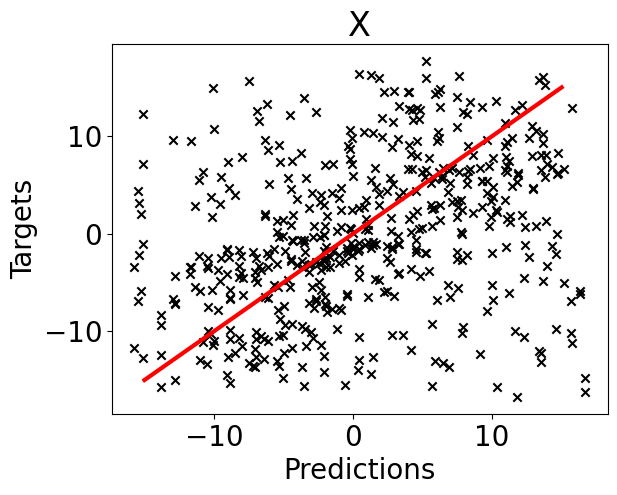

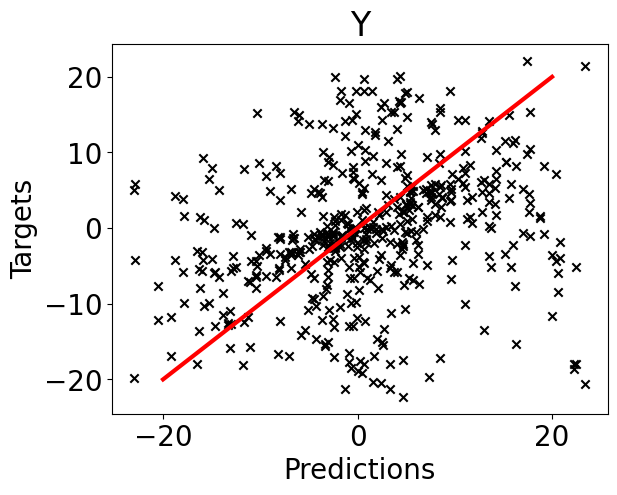

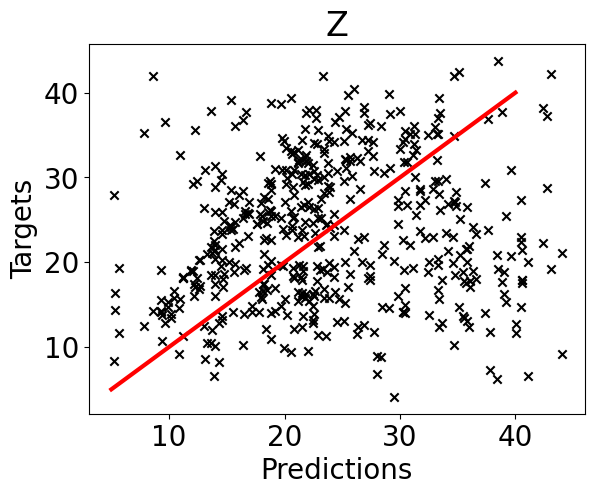

In [ ]:

for coord in range (0,3):
  if coord==0:
    title='X'
    a=-15
    b=15
  elif coord==1:
    title='Y'
    a=-20
    b=20
  elif coord==2:
    title='Z'
    a=5
    b=40
  plt.scatter(std[coord]*predictions[:,-1,coord]+mean[coord], std[coord]*test_tar[:,-1,coord]+mean[coord], color='black',marker='x' ,label='Data points')
  x=[a,b]
  y=[a,b]
  plt.plot(x, y, color='red' ,label='x=y', linewidth=3.0)


  plt.xlabel('Predictions')
  plt.ylabel('Targets')

  plt.title(title)
  #plt.legend(loc='upper right')
  plt.rcParams['font.size'] = 20
  plt.show()

In [ ]:
print('sequence mse: ', np.mean(tf.keras.losses.mean_squared_error(test_tar[:250]*std+mean, pred*std+mean)))
#print('last step mse: ',np.mean(tf.keras.losses.mean_squared_error(test_tar[:250,-1,:]*std+mean, pred[:,-1,:]*std+mean)))


sequence mse:  227.26148316125153


In [ ]:
tf.reduce_mean(tf.keras.losses.mean_squared_error(test_tar[:250]*std+mean, pred*std+mean)).shape


TensorShape([])

## Sequence to vector

In [ ]:
def last_time_step_mse(y_true,y_pred):
  return tf.keras.metrics.mean_squared_error(y_true[:,-1],y_pred[:,-1])

In [ ]:
train_data.shape

(3500, 900, 3)

In [ ]:
train_tar=np.reshape(train_tar,(train_tar.shape[0],3*train_tar.shape[1]))
val_tar=np.reshape(val_tar,(val_tar.shape[0],3*val_tar.shape[1]))

print(train_tar.shape)
print(train_data.shape)

(3500, 297)
(3500, 900, 3)


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.LSTM(64, return_sequences=True, input_shape=[None, 3]),
tf.keras.layers.LSTM(64),
tf.keras.layers.Dense(3*(target_len-1))
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 64)          17408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 297)               19305     
                                                                 
Total params: 69,737
Trainable params: 69,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', #'mse',#[last_time_step_loss],
          optimizer='adam',
          metrics='mae')

model.fit(train_data, train_tar,
           epochs=20,
           validation_data=(val_data, val_tar))

Epoch 1/20
110/110 [==============================] - 19s 72ms/step - loss: 0.6558 - mae: 0.6193 - val_loss: 0.4029 - val_mae: 0.4643
Epoch 2/20
110/110 [==============================] - 6s 56ms/step - loss: 0.3151 - mae: 0.3898 - val_loss: 0.2307 - val_mae: 0.3235
Epoch 3/20
110/110 [==============================] - 7s 64ms/step - loss: 0.2156 - mae: 0.3070 - val_loss: 0.1711 - val_mae: 0.2676
Epoch 4/20
110/110 [==============================] - 6s 56ms/step - loss: 0.1682 - mae: 0.2628 - val_loss: 0.1726 - val_mae: 0.2471
Epoch 5/20
110/110 [==============================] - 7s 64ms/step - loss: 0.1317 - mae: 0.2261 - val_loss: 0.1086 - val_mae: 0.2007
Epoch 6/20
110/110 [==============================] - 6s 54ms/step - loss: 0.1143 - mae: 0.2071 - val_loss: 0.1004 - val_mae: 0.1856
Epoch 7/20
110/110 [==============================] - 7s 66ms/step - loss: 0.0745 - mae: 0.1648 - val_loss: 0.0736 - val_mae: 0.1551
Epoch 8/20
110/110 [==============================] - 6s 59ms/step -

In [ ]:
model.save('./Lorenz_short_model_S-V_LSTM_1000_norm_100.h5',save_format='h5')

In [ ]:
model = tf.keras.models.load_model('./modelos/Lorenz_short_model_S-V_LSTM_1000_norm_100.h5')

In [ ]:
pred=model.predict(test_data) #make a prediction for a random timeseries
pred=pred.reshape(500,99,3)

16/16 [==============================] - 5s 28ms/step


In [ ]:
print('sequence mse: ', np.mean(tf.keras.losses.mean_squared_error(test_tar*std+mean, pred*std+mean)))
print('last step mse: ',np.mean(tf.keras.losses.mean_squared_error(test_tar[:,-1,:]*std+mean, pred[:,-1,:]*std+mean)))

sequence mse:  3.4736717757844695
last step mse:  8.168564949064026


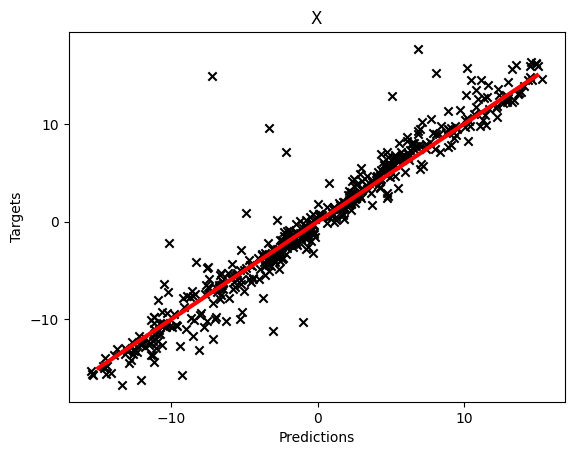

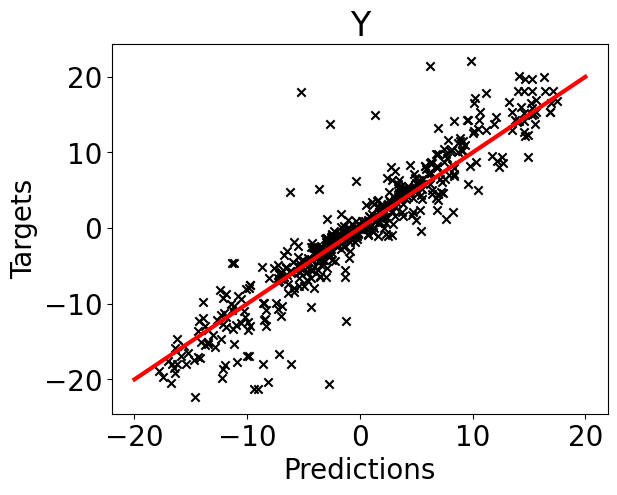

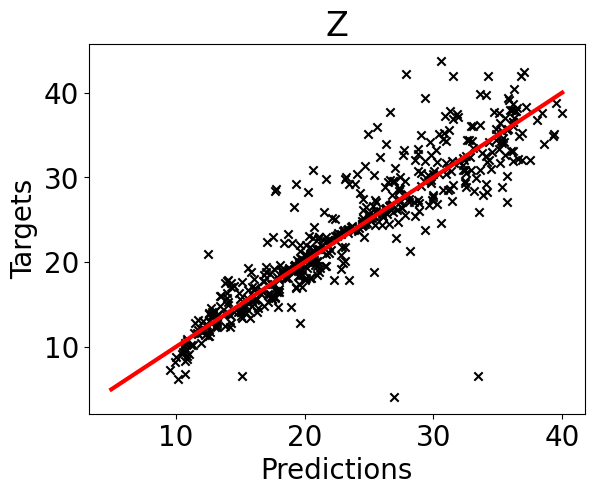

In [ ]:

for coord in range (0,3):
  if coord==0:
    title='X'
    a=-15
    b=15
  elif coord==1:
    title='Y'
    a=-20
    b=20
  elif coord==2:
    title='Z'
    a=5
    b=40
  plt.scatter(std[coord]*pred[:,-2,coord]+mean[coord], std[coord]*test_tar[:,-1,coord]+mean[coord], color='black',marker='x' ,label='Data points')
  x=[a,b]
  y=[a,b]
  plt.plot(x, y, color='red' ,label='x=y', linewidth=3.0)


  plt.xlabel('Predictions')
  plt.ylabel('Targets')

  plt.title(title)
  #plt.legend(loc='upper right')
  plt.rcParams['font.size'] = 20
  plt.show()

1/1 [==============================] - 1s 616ms/step
tf.Tensor(1.4238439448393998, shape=(), dtype=float64)
tf.Tensor(0.6660761906862939, shape=(), dtype=float64)


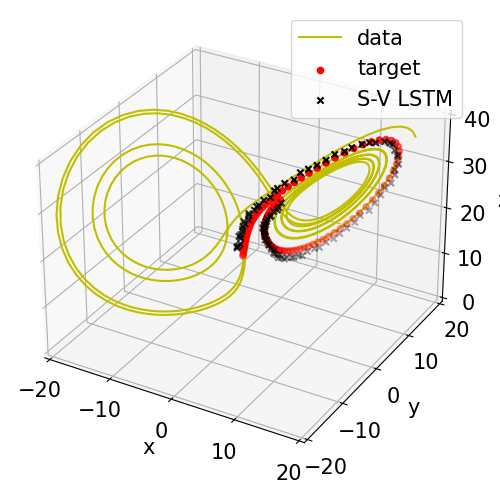

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

random_int = np.random.randint(0, 500)
random_int=16
# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])*std[0]+mean[0]
y_values = np.array([result[1] for result in test_data[random_int]])*std[1]+mean[1]
z_values = np.array([result[2] for result in test_data[random_int]])*std[2]+mean[2]

x_tar=test_tar[random_int,:,0]*std[0]+mean[0]
y_tar=test_tar[random_int,:,1]*std[1]+mean[1]
z_tar=test_tar[random_int,:,2]*std[2]+mean[2]

pred=model.predict(test_data[random_int].reshape(1,train_data.shape[1], 3)) #make a prediction for a random timeseries
pred=pred.reshape(1,99,3)
x_DRNN=pred[0,:,0]*std[0]+mean[0]
y_DRNN=pred[0,:,1]*std[1]+mean[1]
z_DRNN=pred[0,:,2]*std[2]+mean[2]

fig = plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 15
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,'y',label='data')
ax.scatter(x_tar,y_tar,z_tar, c='red', label='target',zorder=11)
ax.scatter(x_DRNN[:-1],y_DRNN[:-1],z_DRNN[:-1], c='black',marker='x', label='S-V LSTM',zorder=13)

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()


plt.savefig('./Lorenz_S-VLSTM_3D_{i}.png'.format(i=random_int))

print(tf.reduce_mean(tf.keras.metrics.mean_squared_error(test_tar[random_int]*std+mean,pred*std+mean)))
print(tf.reduce_mean(tf.keras.metrics.mean_squared_error(test_tar[random_int,-1,:]*std+mean,pred[:,-1,:]*std+mean)))

<ipython-input-40-e9e39b4962e8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(900,999), x_tar.reshape(99) , 'ro', label='target', color='red')
<ipython-input-40-e9e39b4962e8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(900,999), x_DRNN[:-1].reshape(99), 'bx', label='S-V LSTM', color='black')


<Figure size 1000x600 with 0 Axes>

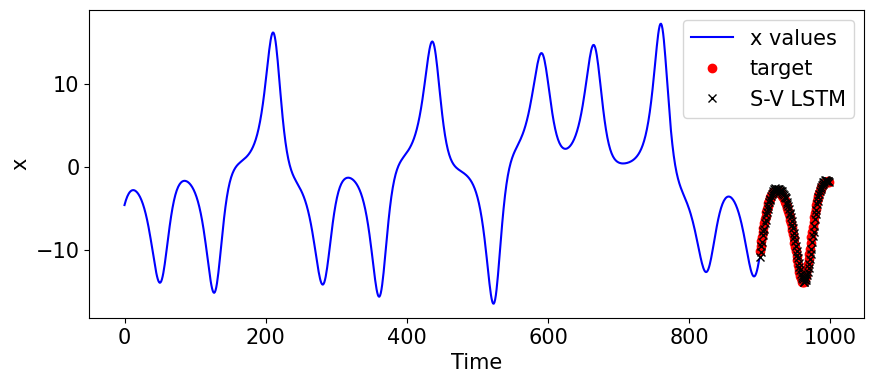

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create an array for time
time_values = np.arange(len(test_data[random_int]))
time_values_tar = np.arange(950,1000)
# Plot the 3D figure
fig = plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 15

# Create a 2D plot for the projection on the x-axis
fig2 = plt.figure(figsize=(10, 4))
plt.plot(time_values, x_values, label='x values', color='blue')
plt.plot(np.arange(900,999), x_tar.reshape(99) , 'ro', label='target', color='red')
plt.plot(np.arange(900,999), x_DRNN[:-1].reshape(99), 'bx', label='S-V LSTM', color='black')

plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.savefig('./Lorenz_S-VLSTM_proj_{i}.png'.format(i=random_int))
plt.show()

##Use a sequence to sequence network and train it to give all steps at once

### Creating new targets

In [ ]:
#now, every target will contain n_steps vectors of dimension 10, each one shifted by 10 steps.
n_steps=1000
target_len=100
Y = np.empty((data.shape[0], n_steps-target_len, target_len,3)) # each target is a sequence of 100D vectors
print(n_steps)
print(Y.shape)
print(data.shape)
for step_ahead in range(1, target_len):
  Y[:, :, step_ahead - 1,:] = data[:, step_ahead:step_ahead + n_steps-target_len, :]


1000
(5000, 900, 100, 3)
(5000, 1000, 3)


In [ ]:
#Dividing the
train_samples=3500
val_samples=1000
#Y_train = Y[:train_samples]
#Y_valid = Y[train_samples:train_samples+val_samples]
Y_test =  Y[train_samples:train_samples+val_samples:]
print(Y_train.shape)

NameError: ignored

In [ ]:
#Reshape targets so we can feed them to the model
print(Y_train.shape)
Y_train=np.reshape(Y_train,(train_samples,n_steps-target_len,3*target_len))
Y_valid=np.reshape(Y_valid,(val_samples,n_steps-target_len,3*target_len))
print(Y_train.shape)

(350, 400, 100, 3)
(350, 400, 300)


### Define the model

In [ ]:
model15 = tf.keras.models.Sequential([
tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[None, 3]),
tf.keras.layers.SimpleRNN(64, return_sequences=True),
tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(3*target_len))
])
model15.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 64)          4352      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 time_distributed (TimeDistr  (None, None, 300)        19500     
 ibuted)                                                         
                                                                 
Total params: 32,108
Trainable params: 32,108
Non-trainable params: 0
_________________________________________________________________


### Define custom loss and metrics

In [ ]:
def last_time_step_mse(y_true,y_pred):
  return tf.keras.metrics.mean_squared_error(y_true[:,-1],y_pred[:,-1])

### Model compile and fit

In [ ]:
model15.compile(loss='mse', #'mse',#[last_time_step_loss],
          optimizer='adam',
          metrics='mae')

model15.fit(train_data, Y_train,
           epochs=20,
           validation_data=(val_data, Y_valid))

In [ ]:
model15.save('./Lorenz_LSTM_seq-seq_1000.h5')

### Results


In [ ]:
model15 = tf.keras.models.load_model('./modelos/Lorenz_LSTM_seq-seq_1000_norm_100.h5')

In [ ]:
pred=model15.predict(test_data)
pred=pred.reshape(500,900,100,3)
print(pred.shape)

16/16 [==============================] - 9s 53ms/step
(500, 900, 100, 3)


In [ ]:
#mse
print('Series',np.mean(tf.keras.losses.mean_squared_error(test_tar*std+mean, pred[:,-1,:-1,:]*std+mean)))
print('Last step',np.mean(tf.keras.losses.mean_squared_error(test_tar[:,-1,:]*std+mean, pred[:,-1,-2,:]*std+mean)))

Series 1.1842082428583778
Last step 2.2664782055976658


In [ ]:
#mae
print('Series',np.mean(tf.keras.losses.mean_absolute_error(test_tar*std+mean, pred[:,-1,:-1,:]*std+mean)))
print('Last step',np.mean(tf.keras.losses.mean_absolute_error(test_tar[:,-1,:]*std+mean, pred[:,-1,-2,:]*std+mean)))

Series 0.6488166969887781
Last step 0.9282204181423607


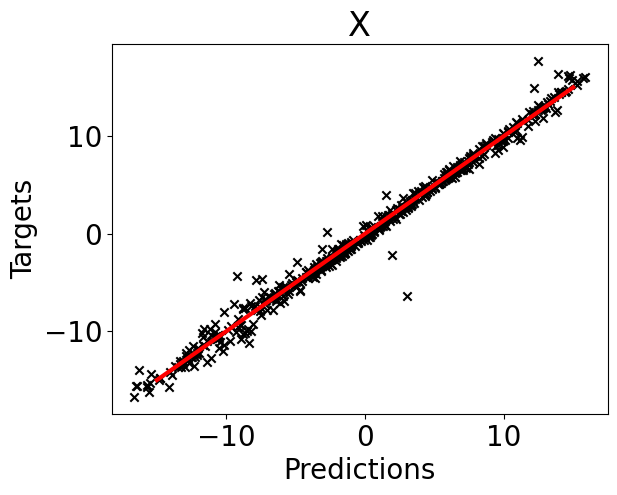

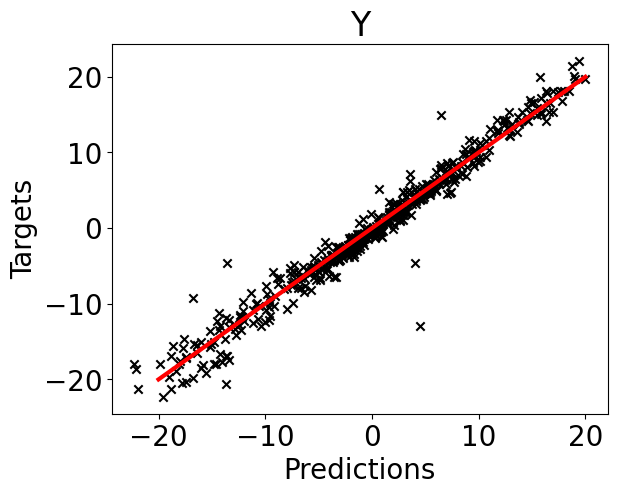

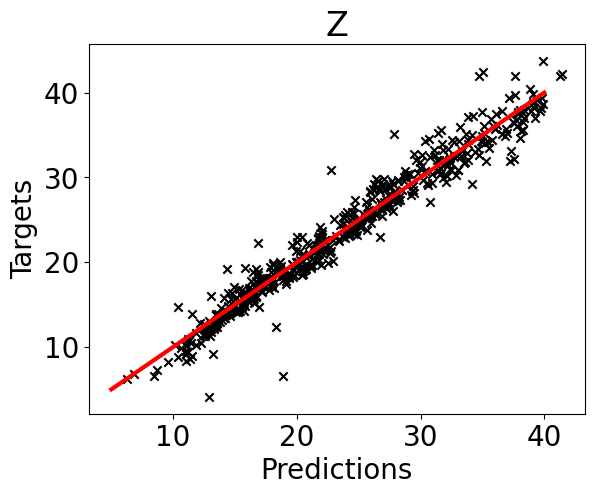

In [ ]:

for coord in range (0,3):
  if coord==0:
    title='X'
    a=-15
    b=15
  elif coord==1:
    title='Y'
    a=-20
    b=20
  elif coord==2:
    title='Z'
    a=5
    b=40
  plt.scatter(std[coord]*pred[:,-1,-2,coord]+mean[coord], std[coord]*test_tar[:,-1,coord]+mean[coord], color='black',marker='x' ,label='Data points')
  x=[a,b]
  y=[a,b]
  plt.plot(x, y, color='red' ,label='x=y', linewidth=3.0)


  plt.xlabel('Predictions')
  plt.ylabel('Targets')

  plt.title(title)
  #plt.legend(loc='upper right')
  plt.rcParams['font.size'] = 20
  plt.show()

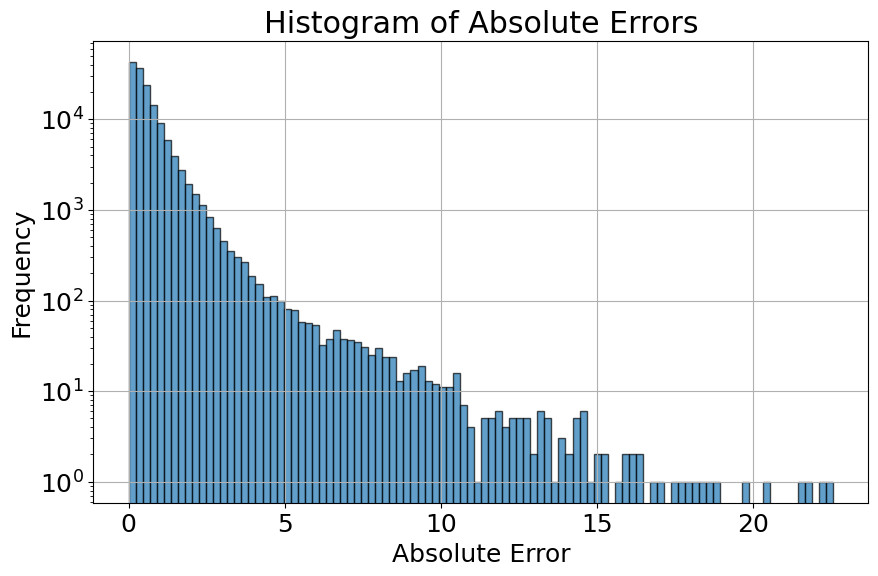

0.6488166969887781


In [ ]:
abs_error=abs(test_tar*std+mean- pred[:,-1,:-1,:]*std-mean)
flat_abs_error = abs_error.flatten()
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(flat_abs_error, bins=100, edgecolor='black', alpha=0.7)
plt.title('Histogram of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.yscale('log')
plt.show()
print(np.mean(flat_abs_error))

0.15707226328215


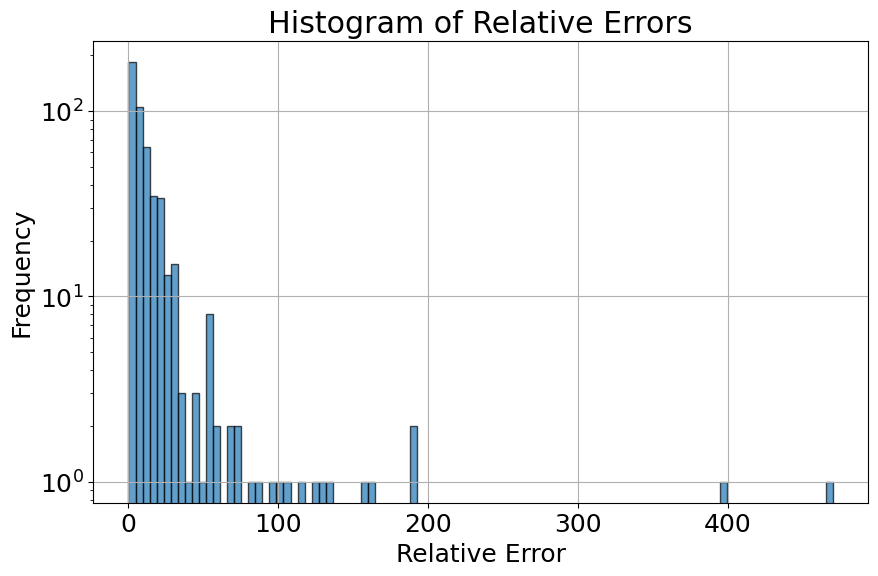

4.7003134584868915
(488, 99, 3)


In [ ]:
#rel_errors = (1/3)*((1 - (std[0] * pred[:,-1,-2,0] + mean[0]) / (std[0] * test_tar[:,-1,0] + mean[0] ))+(1 - (std[1] * pred[:,-1,-2,1] + mean[1]) / (std[1] * test_tar[:,-1,1] + mean[1] ))+(1 - (std[2] * pred[:,-1,-2,2] + mean[2]) / (std[2] * test_tar[:,-1,2] + mean[2] )))
within_range_indices = np.where((abs(std[0]*test_tar[:,-1,0]+mean[0]) > 0.1)&(abs(std[1]*test_tar[:,-1,1]+mean[1]) > 0.1)&(abs(std[2]*test_tar[:,-1,2]+mean[2]) > 0.1))
rel_errors = (1/3)*((1 - (std[0] * pred[within_range_indices,-1,-2,0] + mean[0]) / (std[0] * test_tar[within_range_indices,-1,0] + mean[0] ))+(1 - (std[1] * pred[within_range_indices,-1,-2,1] + mean[1]) / (std[1] * test_tar[within_range_indices,-1,1] + mean[1] ))+(1 - (std[2] * pred[within_range_indices,-1,-2,2] + mean[2]) / (std[2] * test_tar[within_range_indices,-1,2] + mean[2] )))
print(np.mean(abs(rel_errors)))
flat_rel_errors = abs(rel_errors).flatten()
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(abs(flat_rel_errors)*100, bins=100, edgecolor='black', alpha=0.7)
plt.title('Histogram of Relative Errors')
plt.xlabel('Relative Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.yscale('log')
plt.show()
print(np.max(rel_errors))
print(test_tar[within_range_indices].shape)

In [ ]:
#Calculating relative errors for the last timestep of each coordinate
c=0#coordinate
rel_errors_x = (1 - (std[c] * pred[:,-1,-2,c] + mean[c]) / (std[c] * test_tar[:,-1,c] + mean[c] ))
print(np.mean(abs(rel_errors_x)))
within_range_indices = np.where((std[c]*test_tar[:,-1,c]+mean[c]) > 1)
rel_errors_x = (1 - (std[c] * pred[within_range_indices,-1,-2,c] + mean[c]) / (std[c] * test_tar[within_range_indices,-1,c] + mean[c] ))
print(np.mean(abs(rel_errors_x)))

0.3402002135031378
0.07252003179557688


In [ ]:
within_range_indices = np.where((flat_rel_errors*100 <= 10))
print(' Falla por <=10 %s: ',len(within_range_indices[0]))

within_range_indices = np.where((flat_rel_errors*100 <= 25))
print(' Falla por <=25 %: ',len(within_range_indices[0]))

within_range_indices = np.where((flat_rel_errors*100 <= 50))
print(' Falla por <=50 %: ',len(within_range_indices[0]))

within_range_indices = np.where((flat_rel_errors*100 <= 100))
print(' Falla por <=100 %: ',len(within_range_indices[0]))

within_range_indices = np.where((flat_rel_errors*100 <= 200))
print(' Falla por <=200 %: ',len(within_range_indices[0]))


within_range_indices = np.where((flat_rel_errors*100 <= 500))
print(' Falla por <=500 %: ',len(within_range_indices[0]))

within_range_indices = np.where((flat_rel_errors*100 <= 1000))
print(' Falla por <=1000 %: ',len(within_range_indices[0]))


within_range_indices = np.where((flat_rel_errors*100 > 10) )
print('  ',np.mean(abs(test_tar[within_range_indices,-1,:]*std+mean)))





 Falla por <=10 %s:  297
 Falla por <=25 %:  432
 Falla por <=50 %:  462
 Falla por <=100 %:  480
 Falla por <=200 %:  492
 Falla por <=500 %:  496
 Falla por <=1000 %:  499
   10.778521748768473


Number of relative error values greater than 100: 0


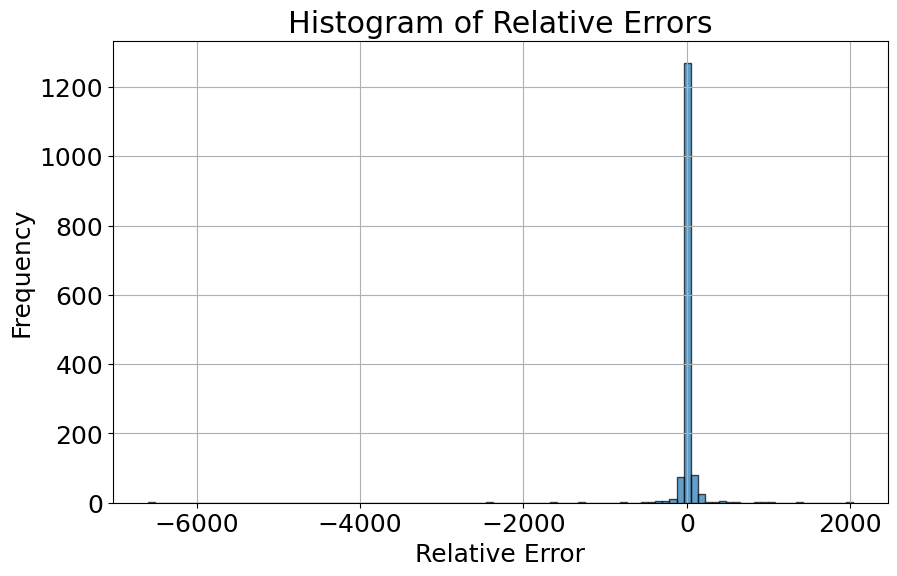

2.6857404257070003
1500


In [ ]:
count_greater_than_100 = np.sum(rel_errors < -1000)

print("Number of relative error values greater than 100:", count_greater_than_100)
valid_indices = rel_errors <= 100
valid_rel_errors = rel_errors[valid_indices]
valid_indices = valid_rel_errors >= -100
# Select only the valid relative error values
valid_rel_errors = valid_rel_errors[valid_indices]
flat_rel_errors = valid_rel_errors.flatten()*100
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(flat_rel_errors, bins=100, edgecolor='black', alpha=0.7)
plt.title('Histogram of Relative Errors')
plt.xlabel('Relative Error')
plt.ylabel('Frequency')
plt.grid(True)
#plt.xscale('log')
plt.show()
print(np.mean(valid_rel_errors)*100)
print(len(valid_rel_errors))

### Plotting predictions vs true values

1/1 [==============================] - 1s 1s/step
tf.Tensor(0.22956143530547318, shape=(), dtype=float64)
tf.Tensor(0.28446688912754187, shape=(), dtype=float64)


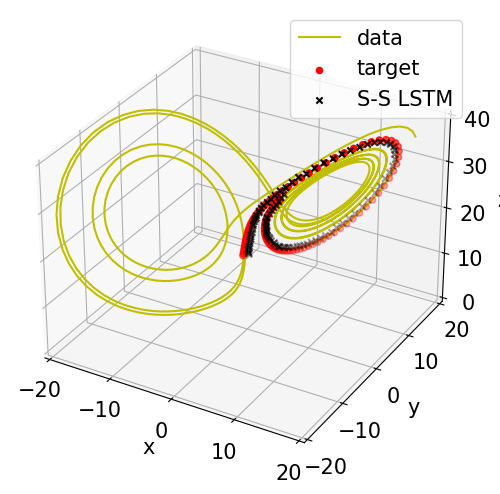

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

random_int = np.random.randint(0, 500)
random_int=16
# Extract x, y, z values from the results
x_values = np.array([result[0] for result in test_data[random_int]])*std[0]+mean[0]
y_values = np.array([result[1] for result in test_data[random_int]])*std[1]+mean[1]
z_values = np.array([result[2] for result in test_data[random_int]])*std[2]+mean[2]

x_tar=test_tar[random_int,:,0]*std[0]+mean[0]
y_tar=test_tar[random_int,:,1]*std[1]+mean[1]
z_tar=test_tar[random_int,:,2]*std[2]+mean[2]

pred=model15.predict(test_data[random_int].reshape(1,train_data.shape[1], 3)) #make a prediction for a random timeseries
pred=pred.reshape(1,900,100,3)
x_DRNN=pred[0,-1,:,0]*std[0]+mean[0]
y_DRNN=pred[0,-1,:,1]*std[1]+mean[1]
z_DRNN=pred[0,-1,:,2]*std[2]+mean[2]

fig = plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 15
ax = fig.add_subplot(1,1,1, projection='3d')

axis_lim=20
ax.plot(x_values, y_values, z_values,'y',label='data')
ax.scatter(x_tar,y_tar,z_tar, c='red', label='target',zorder=10)
ax.scatter(x_DRNN[:-1],y_DRNN[:-1],z_DRNN[:-1], c='black',marker='x', label='S-S LSTM',zorder=12)

ax.set_xlim3d(-axis_lim, axis_lim);
ax.set_ylim3d(-axis_lim, axis_lim);
ax.set_zlim3d(0, 2*axis_lim);
# Set labels for x, y, and z axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()


plt.savefig('./Lorenz_S-SLSTM_3D_{i}.png'.format(i=random_int))
print(tf.reduce_mean(tf.keras.metrics.mean_squared_error(test_tar[random_int]*std+mean,pred[:,-1,:-1,:]*std+mean)))
print(tf.reduce_mean(tf.keras.metrics.mean_squared_error(test_tar[random_int,-1,:]*std+mean,pred[:,-1,-2,:]*std+mean)))

<ipython-input-42-92ab99682b9f>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(900,999), x_tar.reshape(99) , 'ro', label='target', color='red')
<ipython-input-42-92ab99682b9f>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(900,999), x_DRNN[:-1].reshape(99), 'bx', label='S-S LSTM', color='black')


<Figure size 1000x600 with 0 Axes>

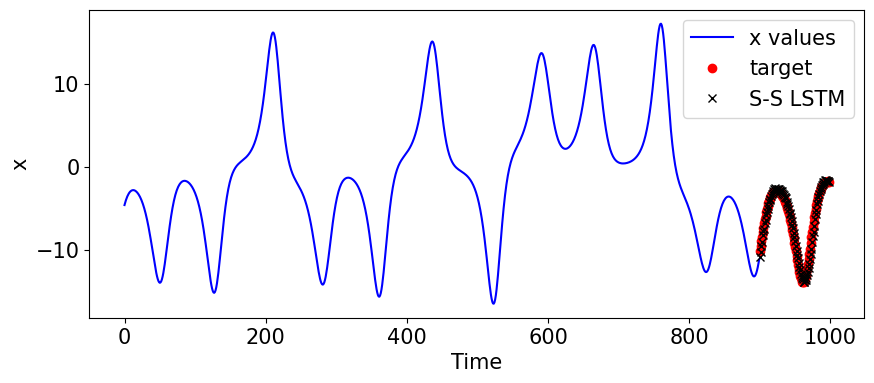

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create an array for time
time_values = np.arange(len(test_data[random_int]))
time_values_tar = np.arange(900,1000)
# Plot the 3D figure
fig = plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 15

# Create a 2D plot for the projection on the x-axis
fig2 = plt.figure(figsize=(10, 4))
plt.plot(time_values, x_values, label='x values', color='blue')
plt.plot(np.arange(900,999), x_tar.reshape(99) , 'ro', label='target', color='red')
plt.plot(np.arange(900,999), x_DRNN[:-1].reshape(99), 'bx', label='S-S LSTM', color='black')

plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.savefig('./Lorenz_S-SLSTM_proj_{i}.png'.format(i=random_int))
plt.show()